In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.spatial.distance import cdist
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Rectangle
from scipy.special import comb
import scipy.io

import sys
import csv
import pickle 
sys.path.insert(0, "/Users/bengieru/Desktop/code/Neuronal_Cascades/Simplicial_Model")

from Neuronal_Cascades_base import Geometric_Brain_Network
#from graph_tool.all import *

In [2]:
%%time
topology = 'Ring'
size = 300
GD = 8
nGD = range(5)
networks = [Geometric_Brain_Network.Geometric_Brain_Network(size, manifold = topology, 
                                                          geometric_degree = GD, 
                                                          nongeometric_degree = ngd) for ngd in nGD]

ring_positions = np.zeros((2,size))
for i in range(size):
    ring_positions[:,i] = (np.sin(np.pi*2*(i/size)),np.cos(np.pi*2*(i/size)))
    
distance_matrix = cdist(ring_positions.T, ring_positions.T, 'euclidean')

CPU times: user 578 ms, sys: 4.73 ms, total: 583 ms
Wall time: 582 ms


In [3]:
distributions = {}
for ngd in nGD:    
    edge_dist = []
    for j, e in enumerate(np.array(np.nonzero(networks[ngd].A)).T):
        edge_dist.append((e[0],e[1],distance_matrix[e[0]][e[1]]))

    distribution = []
    for triple in edge_dist:
        distribution.append(triple[2])
    distributions['%d'%ngd] = distribution
    
triangle_sizes = {}
for ngd in nGD:
    triangle_min_size = []
    triangle_max_size = []
    triangle_mean_size = []
    triangle_size = []
    for i in range(size):
        if len(networks[ngd].triangles['%d'%i])>0:
            for j, pair in enumerate(networks[ngd].triangles['%d'%i]):
                triangle_mean_size.append((distance_matrix[i,pair[0]]+distance_matrix[i,pair[1]]+distance_matrix[pair[0],pair[1]])/3)
                triangle_min_size.append(min(distance_matrix[i,pair[0]],distance_matrix[i,pair[1]],distance_matrix[pair[0],pair[1]]))
                triangle_max_size.append(max(distance_matrix[i,pair[0]],distance_matrix[i,pair[1]],distance_matrix[pair[0],pair[1]]))
    triangle_size.append(triangle_mean_size)
    triangle_size.append(triangle_max_size)
    triangle_size.append(triangle_min_size)
    
    triangle_sizes['%d'%ngd] = triangle_size

In [4]:
# fig, ax = plt.subplots(1,5, figsize =(50,10))

# ax[0].imshow(network.A) 
# ax[0].set_title('Undirected Connectivity of C_elegans', fontsize = 15)
# ax[0].tick_params(axis = 'both', labelsize = 20)

# ax[1].imshow(distance_matrix) 
# ax[1].set_title('Distance matrix of C_elegans', fontsize = 15)
# ax[1].tick_params(axis = 'both', labelsize = 20)

# n, bins, patches = ax[2].hist(np.sum(network.A, axis = 0), bins = 30)
# ax[2].set_title('Degree distribution', fontsize = 15)
# ax[2].tick_params(axis = 'both', labelsize = 20)

# n, bins1, patches = ax[3].hist(distribution, bins = 30)
# ax[3].set_title('Distance distribution', fontsize = 15)
# ax[3].tick_params(axis = 'both', labelsize = 20)

# for i in range(0,4):
#     patches[i].set_facecolor('b')
# for i in range(4,len(patches)):    
#     patches[i].set_facecolor('r')
    
# handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['b', 'r']]
# labels= [['Geometric Edges', 'Non-Geometric Edges']]
# plt.legend(handles, labels)

# ax[4].scatter(ring_positions[0,:].T, ring_positions[1,:].T, s = 100)
# ax[4].set_title('Spatial positions of C_elegans', fontsize = 15)
# ax[4].tick_params(axis = 'both', labelsize = 20)

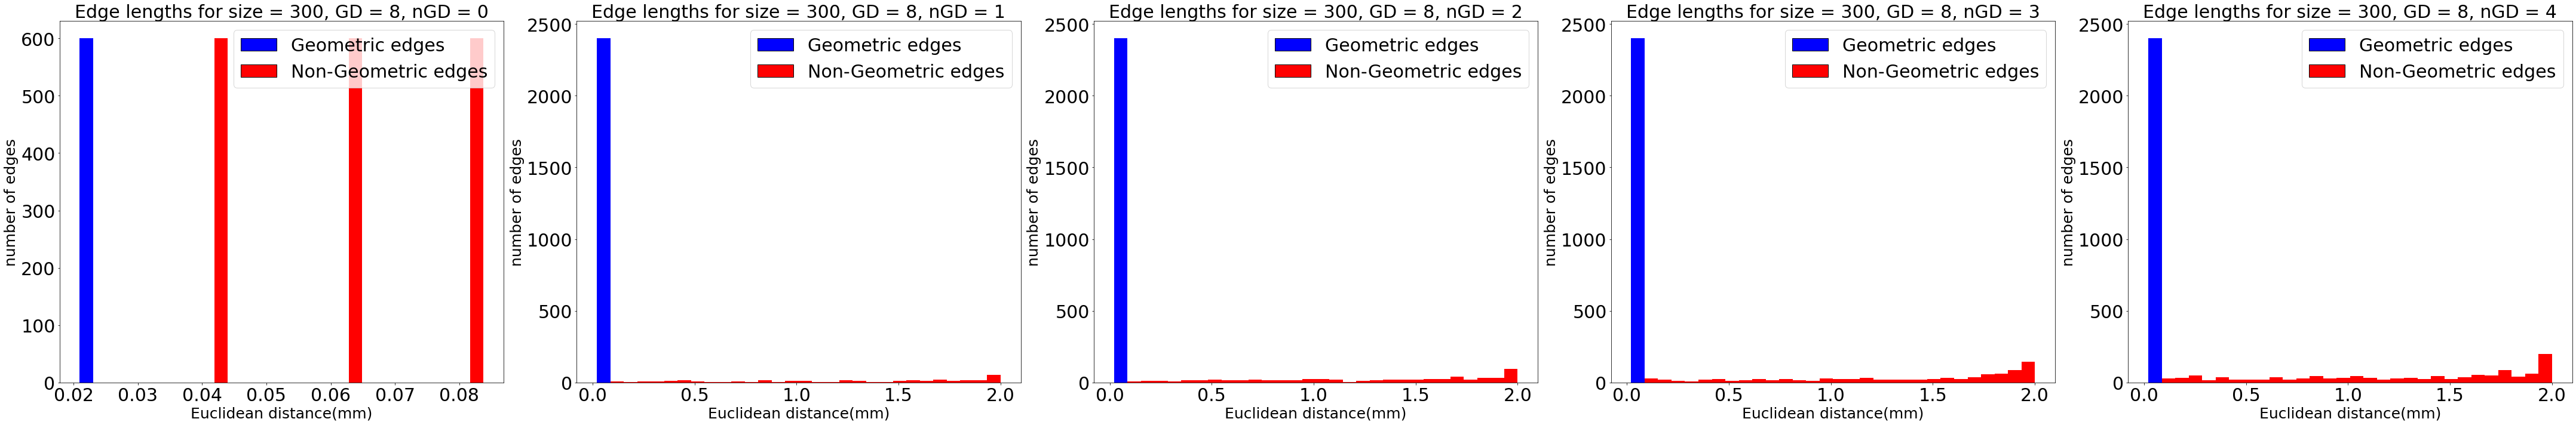

In [5]:
fig, ax = plt.subplots(1,5, figsize =(12*5,10))
for ngd in nGD:
    n, bins1, patches = ax[ngd].hist(distributions['%d'%ngd], bins = 30)
    ax[ngd].set_title('Edge lengths for size = %d, GD = %d, nGD = %d'%(size,GD,ngd), fontsize = 30)
    ax[ngd].tick_params(axis = 'both', labelsize = 30)
    ax[ngd].set_ylabel('number of edges', fontsize = 25)
    ax[ngd].set_xlabel('Euclidean distance(mm)', fontsize = 25)
    
    for i in range(0,1):
        patches[i].set_facecolor('b')
    for i in range(1,len(patches)):    
        patches[i].set_facecolor('r')
    
    handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['b', 'r']]
    labels= ['Geometric edges', 'Non-Geometric edges']
    ax[ngd].legend(handles, labels, prop = dict(size = 30))
plt.tight_layout()

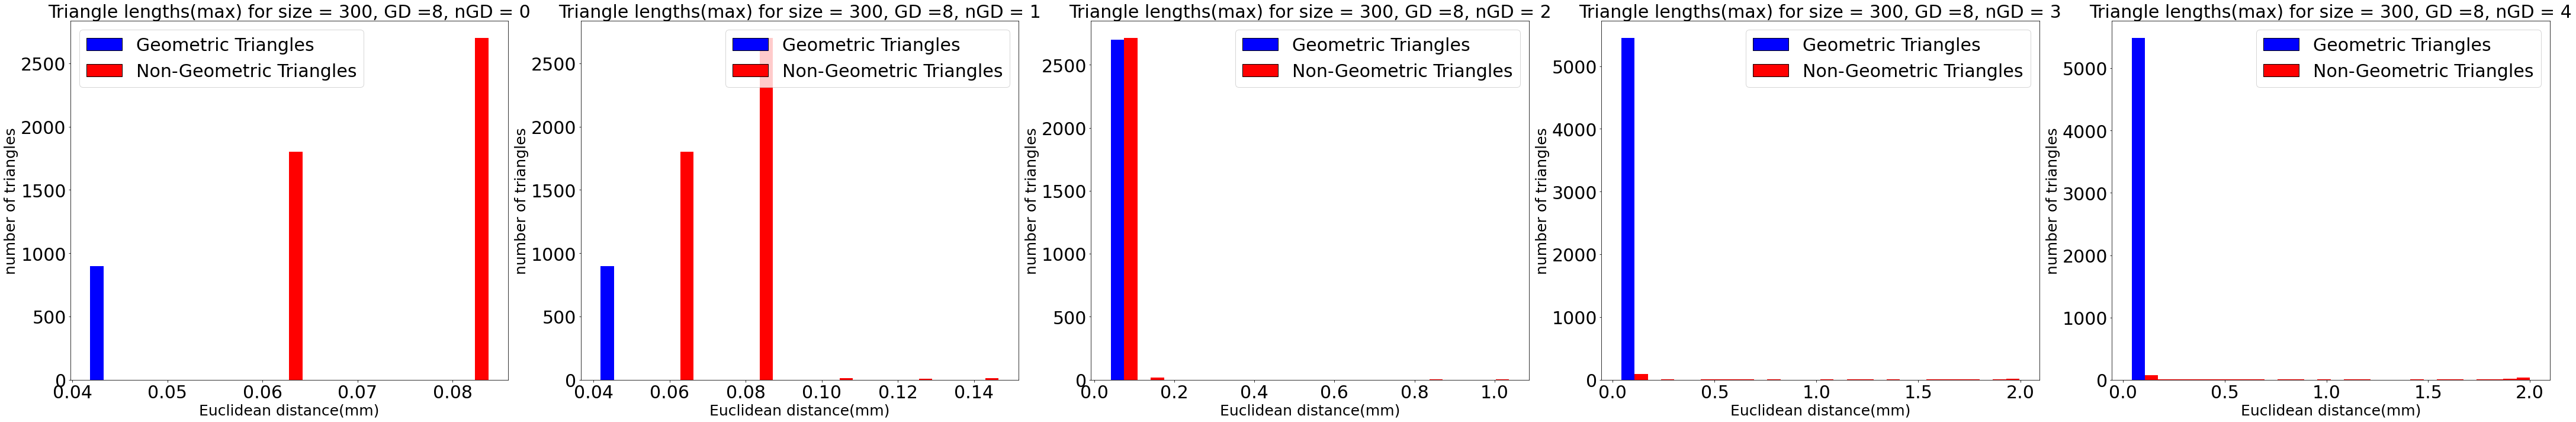

In [6]:
fig,ax = plt.subplots(1,5,figsize = (12*5,10))
for ngd in nGD:
    n, bins, patches = ax[ngd].hist(triangle_sizes['%d'%ngd][1], bins = 30)
    ax[ngd].set_title('Triangle lengths(max) for size = %d, GD =%d, nGD = %d'%(size,GD,ngd), fontsize = 30)
    ax[ngd].tick_params(axis = 'both', labelsize = 30)
    ax[ngd].set_ylabel('number of triangles', fontsize = 25)
    ax[ngd].set_xlabel('Euclidean distance(mm)', fontsize = 25)

    for i in range(0,1):
        patches[i].set_facecolor('b')
    for i in range(1,len(patches)):    
        patches[i].set_facecolor('r')
    
    handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['b', 'r']]
    labels= ['Geometric Triangles', 'Non-Geometric Triangles']
    ax[ngd].legend(handles, labels, prop = dict(size = 30))
plt.tight_layout()
#plt.savefig('/Users/bengieru/Desktop/code/Neuronal_Cascades/Simplicial_Model/c_elegans/dist_distributions.svg')

In [7]:
for ngdd in nGD:
    edge_dist = []
    for j, e in enumerate(np.array(np.nonzero(networks[ngdd].A)).T):
        edge_dist.append((e[0], e[1], distance_matrix[e[0]][e[1]]))

    distance_thresh = bins1[1]
    gd = []
    ngd = []
    for triple in edge_dist:
        if triple[2]<= distance_thresh:
            gd.append((triple[0],triple[1]))
        else:
            ngd.append((triple[0],triple[1]))
    gd_edge_counts = [[] for i in range(size)]
    ngd_edge_counts = [[] for i in range(size)]
    for i, pair in enumerate(gd):
        gd_edge_counts[pair[0]].append(pair)
    for i, pair in enumerate(ngd):
            ngd_edge_counts[pair[0]].append(pair)
    gd_edges = []
    ngd_edges = []
    for i, edges in enumerate(gd_edge_counts):
        gd_edges.append(len(edges))
    for i, edges in enumerate(ngd_edge_counts):
        ngd_edges.append(len(edges))
    print('average nongeometric/geometric degrees per node for noisy ring complex is %.3f and %.3f so the ratio is %.3f'%(np.array(ngd_edges).mean(), np.array(gd_edges).mean(), np.array(ngd_edges).mean()/np.array(gd_edges).mean()))

average nongeometric/geometric degrees per node for noisy ring complex is 0.000 and 8.000 so the ratio is 0.000
average nongeometric/geometric degrees per node for noisy ring complex is 1.000 and 8.000 so the ratio is 0.125
average nongeometric/geometric degrees per node for noisy ring complex is 2.000 and 8.000 so the ratio is 0.250
average nongeometric/geometric degrees per node for noisy ring complex is 3.000 and 8.000 so the ratio is 0.375
average nongeometric/geometric degrees per node for noisy ring complex is 4.000 and 8.000 so the ratio is 0.500


## RUN cascades on noisy geometric

In [8]:
#### EXPERIMENT VARIABLES
TIME = 300 ## number of iterations
C = 10000 ## constant for tuning stochasticity
Ks = [0.1,0.5,0.9] ## constant weighing the edges vs triangles K=0 pure edge contagions, K=1 pure triangle contagion
thresholds = [0.050, 0.100, 0.275, 0.350, 0.500]
trials = 1 # number of trials per set of variables

In [9]:
%%time
#NEURON VARIABLES
memory = TIME ##When a node is activated, it stays active forever(SI model) when memory = TIME.
rest = 0# neurons don't rest

masks = {}
active_edge_length = {}
active_triangle_length = {}
econ = {}
activations = {}
for ngd in nGD[:5]:
    for seed in range(size):##ranges for seeds i
        for k, K in enumerate(Ks):
            for t, threshold in enumerate(thresholds):
                neurons = [Geometric_Brain_Network.neuron(i, memory = memory, rest = rest, threshold = threshold) for i in range(size)]
                networks[ngd].get_neurons(neurons)
                activation, Q, A = networks[ngd].run_dynamic(seed, TIME, C, K)
                activations['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)] = activation
    
                economies = []
                sum_active_edge_length = []
                max_active_triangle_length = []
                #sum_active_triangle_length = []
                #min_active_triangle_length = []
                mask = []
    
                for j in range(size): ## ranges for terminals j
                    if len(networks[ngd].nodes[j].economy)>0: # if the cascade reaches to node j   
                        economies.append(networks[ngd].nodes[j].economy[0][0])# K*(fraction of active 2-simplcies) - (1-K)*(fraction of active 1-simplicies)
                        sum_active_edge_length.append(np.sum(distance_matrix[j,networks[ngd].nodes[j].economy[0][1]]))#sum the lengths of edges that activated j
                        
                        Max = 0
                        #S = 0 #sum the average edge sizes of the triangles that activated j
                        #Min = 0
                        for k, pair in enumerate(networks[ngd].nodes[j].economy[0][2]):
                            Max = Max + max(distance_matrix[j,pair[0]],distance_matrix[j,pair[1]],distance_matrix[pair[0],pair[1]])#max edge size of the triangle
                            #S = S + (distance_matrix[j,pair[0]]+ distance_matrix[j,pair[1]]+distance_matrix[pair[0],pair[1]])/3#average edge size of the triangle
                            #Min = Min + min(distance_matrix[j,pair[0]],distance_matrix[j,pair[1]],distance_matrix[pair[0],pair[1]])#min edge size of the triangle
                        max_active_triangle_length.append(Max)
                        #sum_active_triangle_length.append(S)
                        #min_active_triangle_length.append(Min)
                        mask.append(True)
                    else: 
                        mask.append(False)
                econ['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)] = economies
                active_edge_length['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)] = sum_active_edge_length
                active_triangle_length['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)] = max_active_triangle_length
                #active_triangle_length['%.1f,%d,2'%(K,seed)] = min_active_triangle_length
                #active_triangle_length['%.1f,%d,0'%(K,seed)] = sum_active_triangle_length
                masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)] = mask
old_settings = np.seterr(all = 'ignore')##this to silent an annoying warning

<timed exec>:16: RuntimeWarning: overflow encountered in exp


CPU times: user 52min 4s, sys: 3.54 s, total: 52min 7s
Wall time: 52min 9s


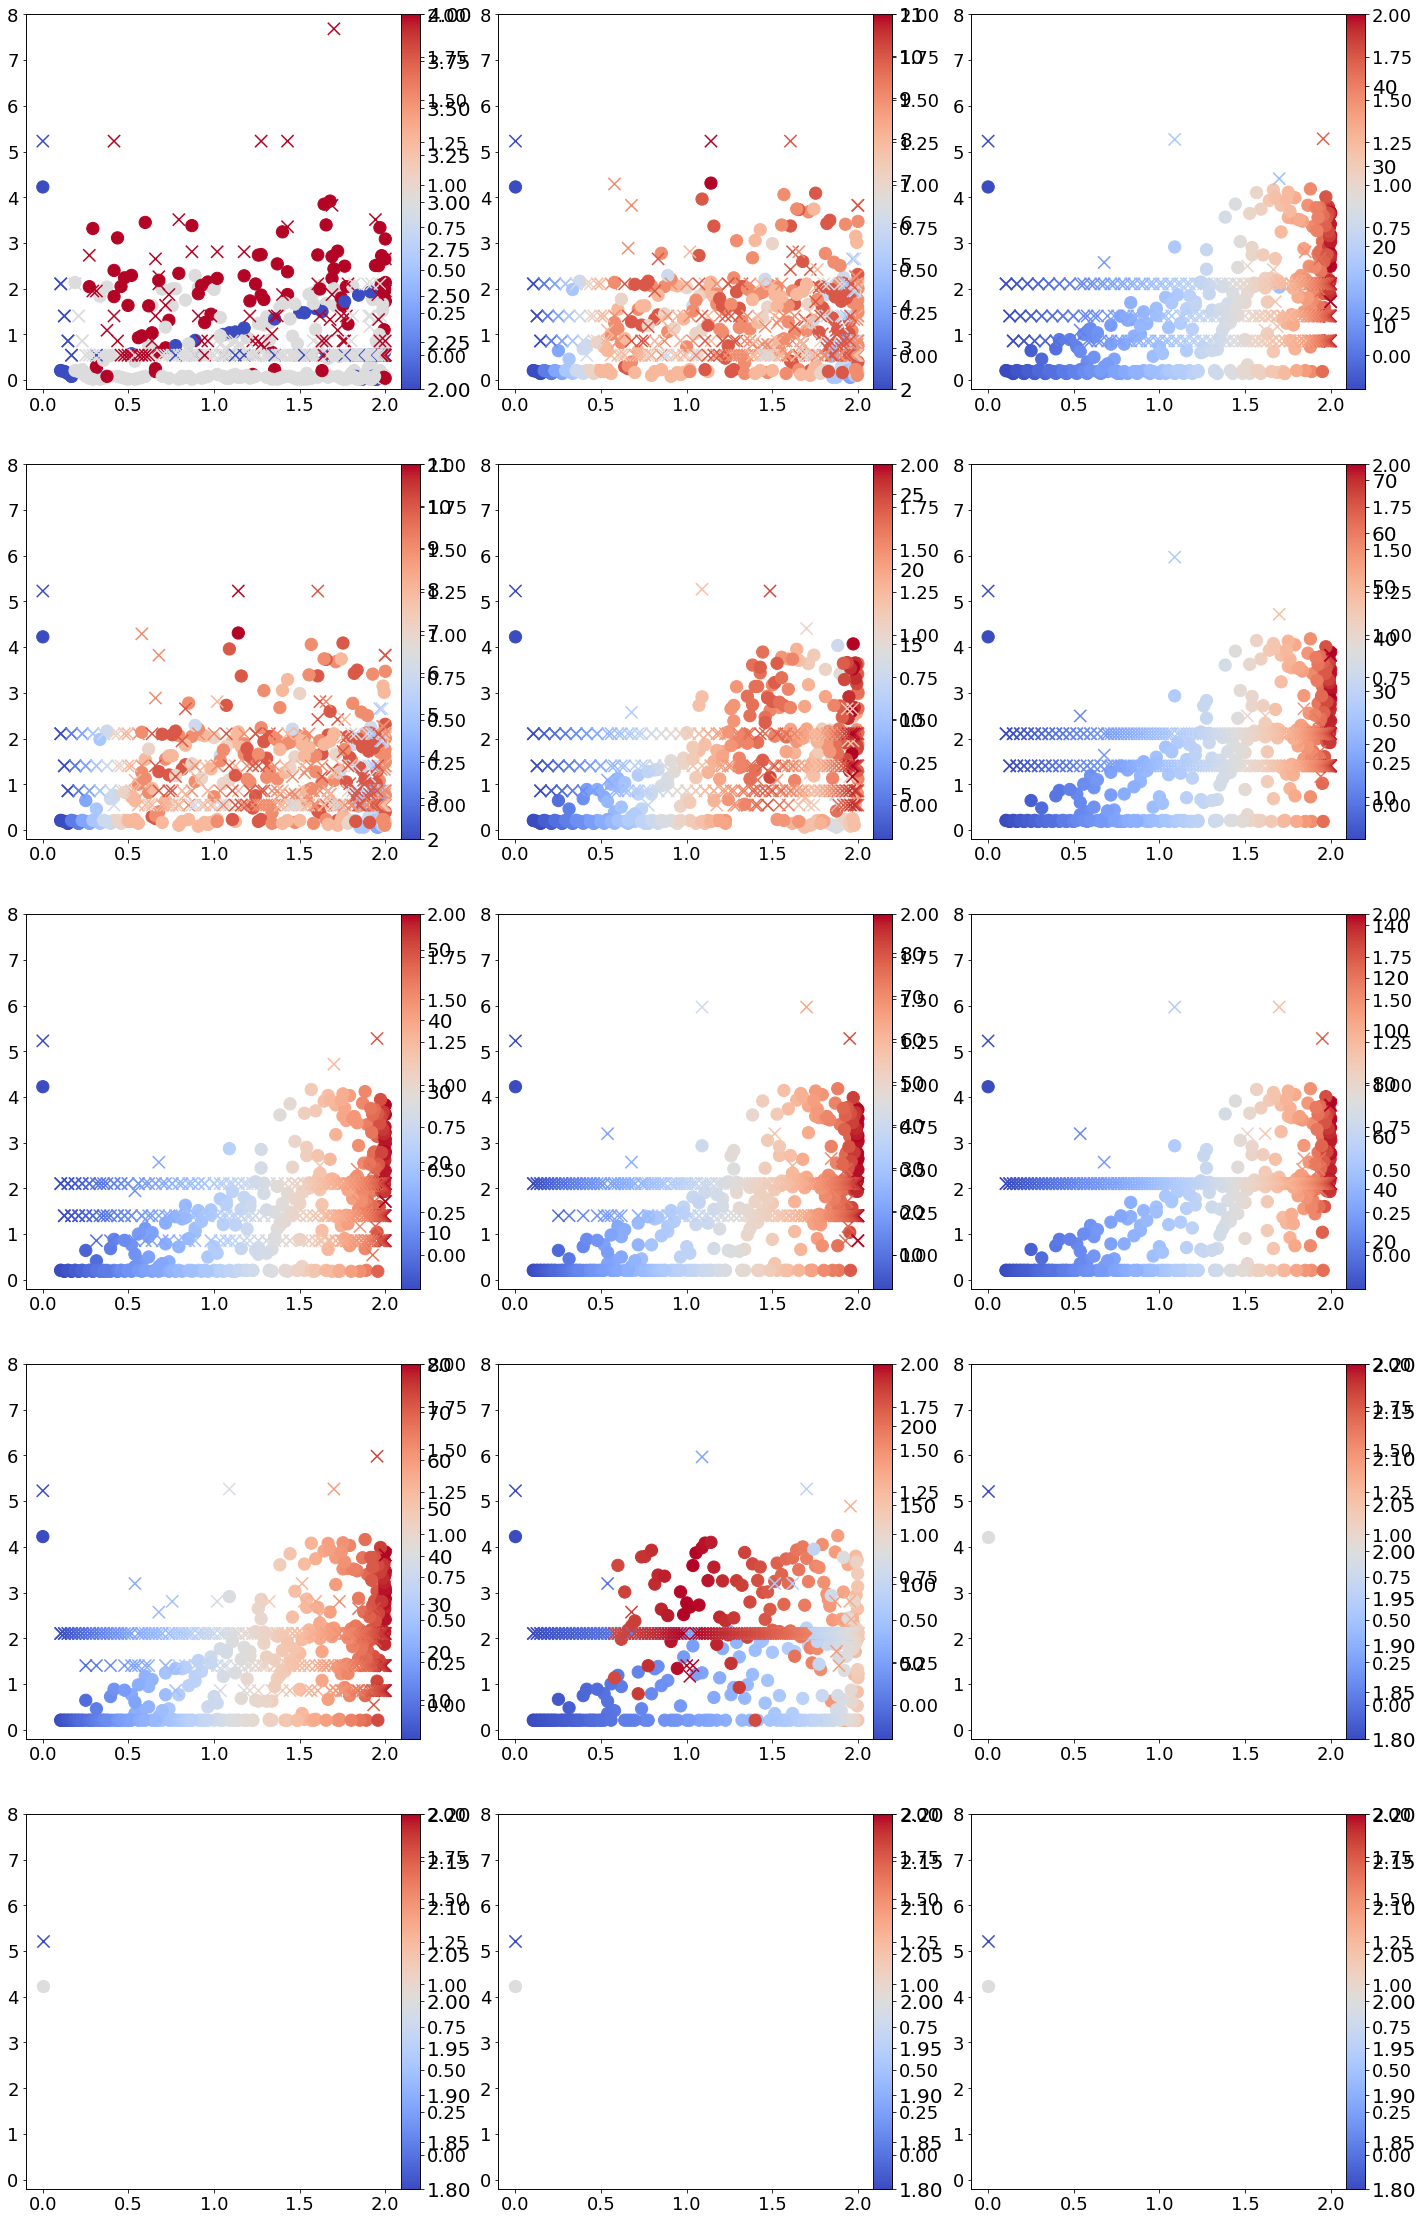

In [114]:
fig,ax = plt.subplots(5,3, figsize = (24,40))
seed = 100
ngd = 2
for i,K in enumerate(Ks):
    for j, threshold in enumerate(thresholds):
        ax1 = ax[j][i].twinx()
        im = ax[j][i].scatter(distance_matrix[seed][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]],
                              active_edge_length['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)], 
                              c = activations['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]], 
                              cmap = 'coolwarm', marker = 'o', label = '1-simplicies', s = 150)
        ax1.scatter(distance_matrix[seed][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]],
                              active_triangle_length['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)], 
                              c = activations['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]],
                              cmap = 'coolwarm', marker = 'x', label = '2-simplicies', s = 150)
        #ax[j][i].set_title('GD = %d, nGD = %d, threshold = %.3f, K = %.1f, '%(GD,ngd,threshold,K), fontsize = 25)
        #ax[j][i].set_xlabel('euclidean_distance', fontsize = 20)
        #ax[j][i].set_ylabel('Cost (1-simplicies)', fontsize = 20)
        ax[j][i].tick_params(axis = 'both', which = 'major', labelsize = 18)
        ax[j][i].set_xlim(-0.1,2.2)
        ax[j][i].set_ylim(-0.2,8)
        #ax[j][i].legend()
        #ax1.set_ylabel('Cost (2-simplicies)', fontsize = 20)
        ax1.tick_params(axis = 'both', which = 'major', labelsize = 18)
        ax1.set_ylim(-0.2,2)
        ax1.set_xlim(-0.1,2.2)
        #ax1.legend()
        divider = make_axes_locatable(ax[j][i])
        cax0 = divider.append_axes("right", size = "5%", pad = 0)
        cbar = fig.colorbar(im, cax = cax0)
        cbar.ax.tick_params(labelsize = 20) 
    
#plt.tight_layout()

plt.savefig('/Users/bengieru/Desktop/figures/DANE/'  + "economy1.svg")

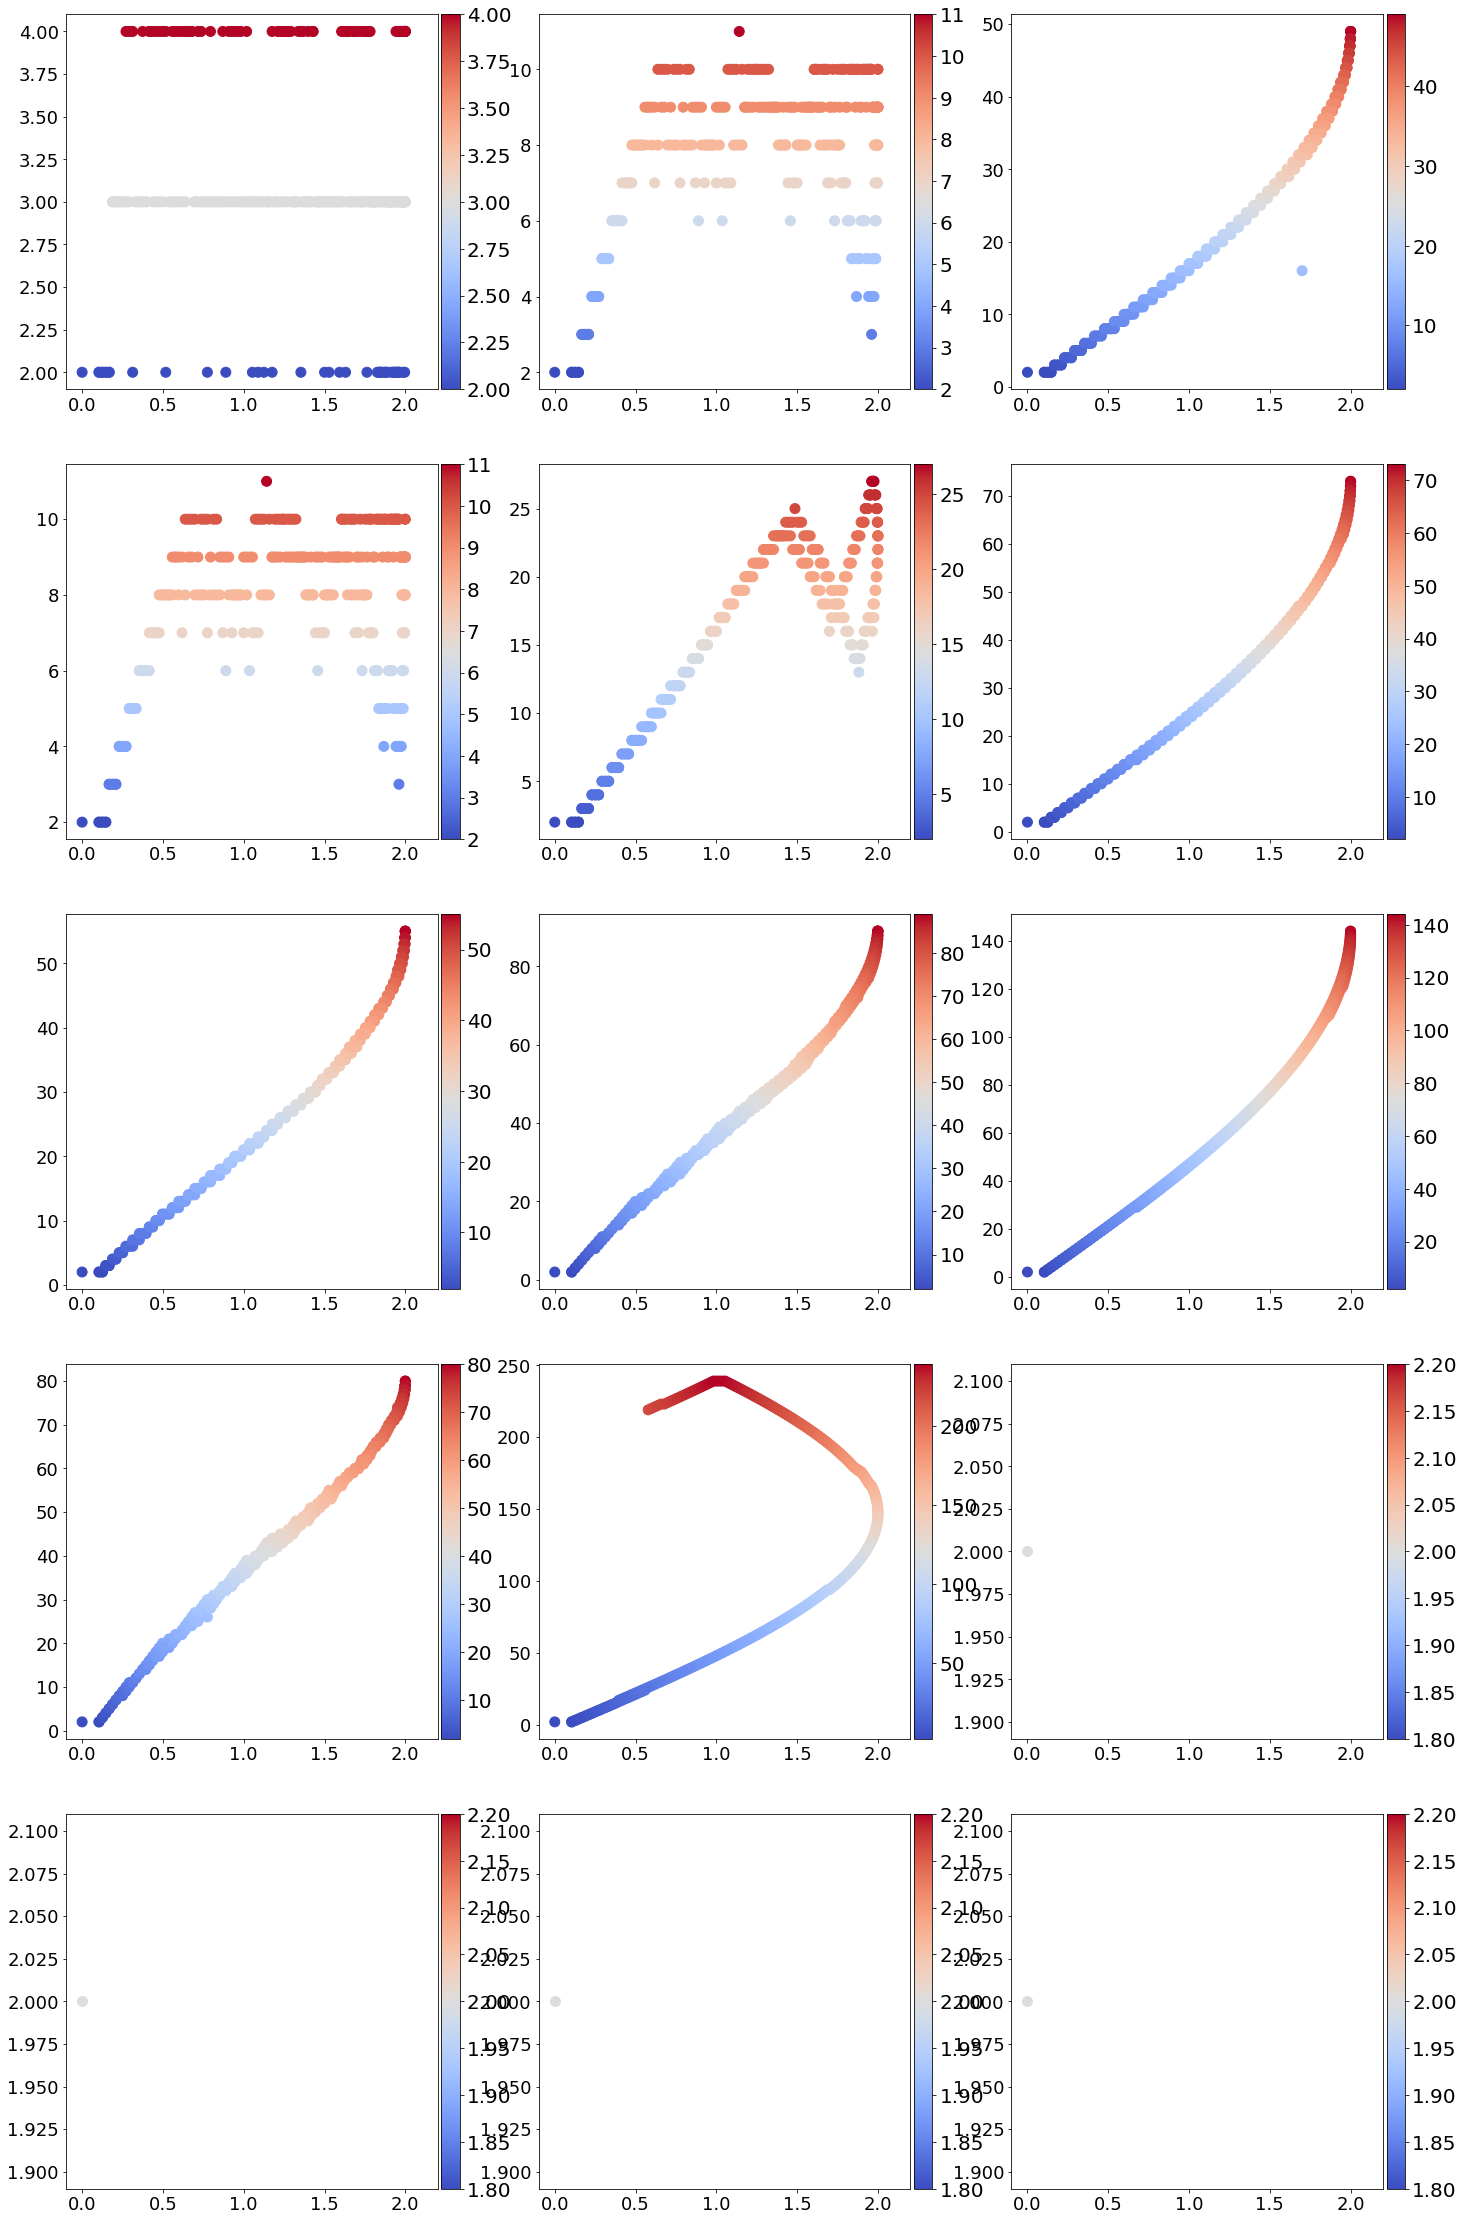

In [128]:
fig,ax = plt.subplots(5,3, figsize = (24,40))
seed = 100
ngd = 2
for i,K in enumerate(Ks):
    for j, threshold in enumerate(thresholds):
        im = ax[j][i].scatter(distance_matrix[seed][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]],
                              activations['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]], 
                              c = activations['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]],
                              cmap = 'coolwarm', marker = 'o', s = 100)
        #ax[j][i].set_title('GD = %d, nGD = %d, threshold = %.3f, K = %.1f, '%(GD,ngd,threshold,K), fontsize = 25)
        #ax[j][i].set_xlabel('euclidean_distance', fontsize = 20)
        #ax[j][i].set_ylabel('Cost (1-simplicies)', fontsize = 20)
        ax[j][i].tick_params(axis = 'both', which = 'major', labelsize = 18)
        ax[j][i].set_xlim(-0.1,2.2)
        #ax[j][i].set_ylim(0,250)
        #ax[j][i].legend()        
        divider = make_axes_locatable(ax[j][i])
        cax0 = divider.append_axes("right", size = "5%", pad = 0.05)
        cbar = fig.colorbar(im, cax = cax0)
        cbar.ax.tick_params(labelsize = 20) 
    
#plt.tight_layout()

plt.savefig('/Users/bengieru/Desktop/figures/DANE/'  + "economy2.svg")

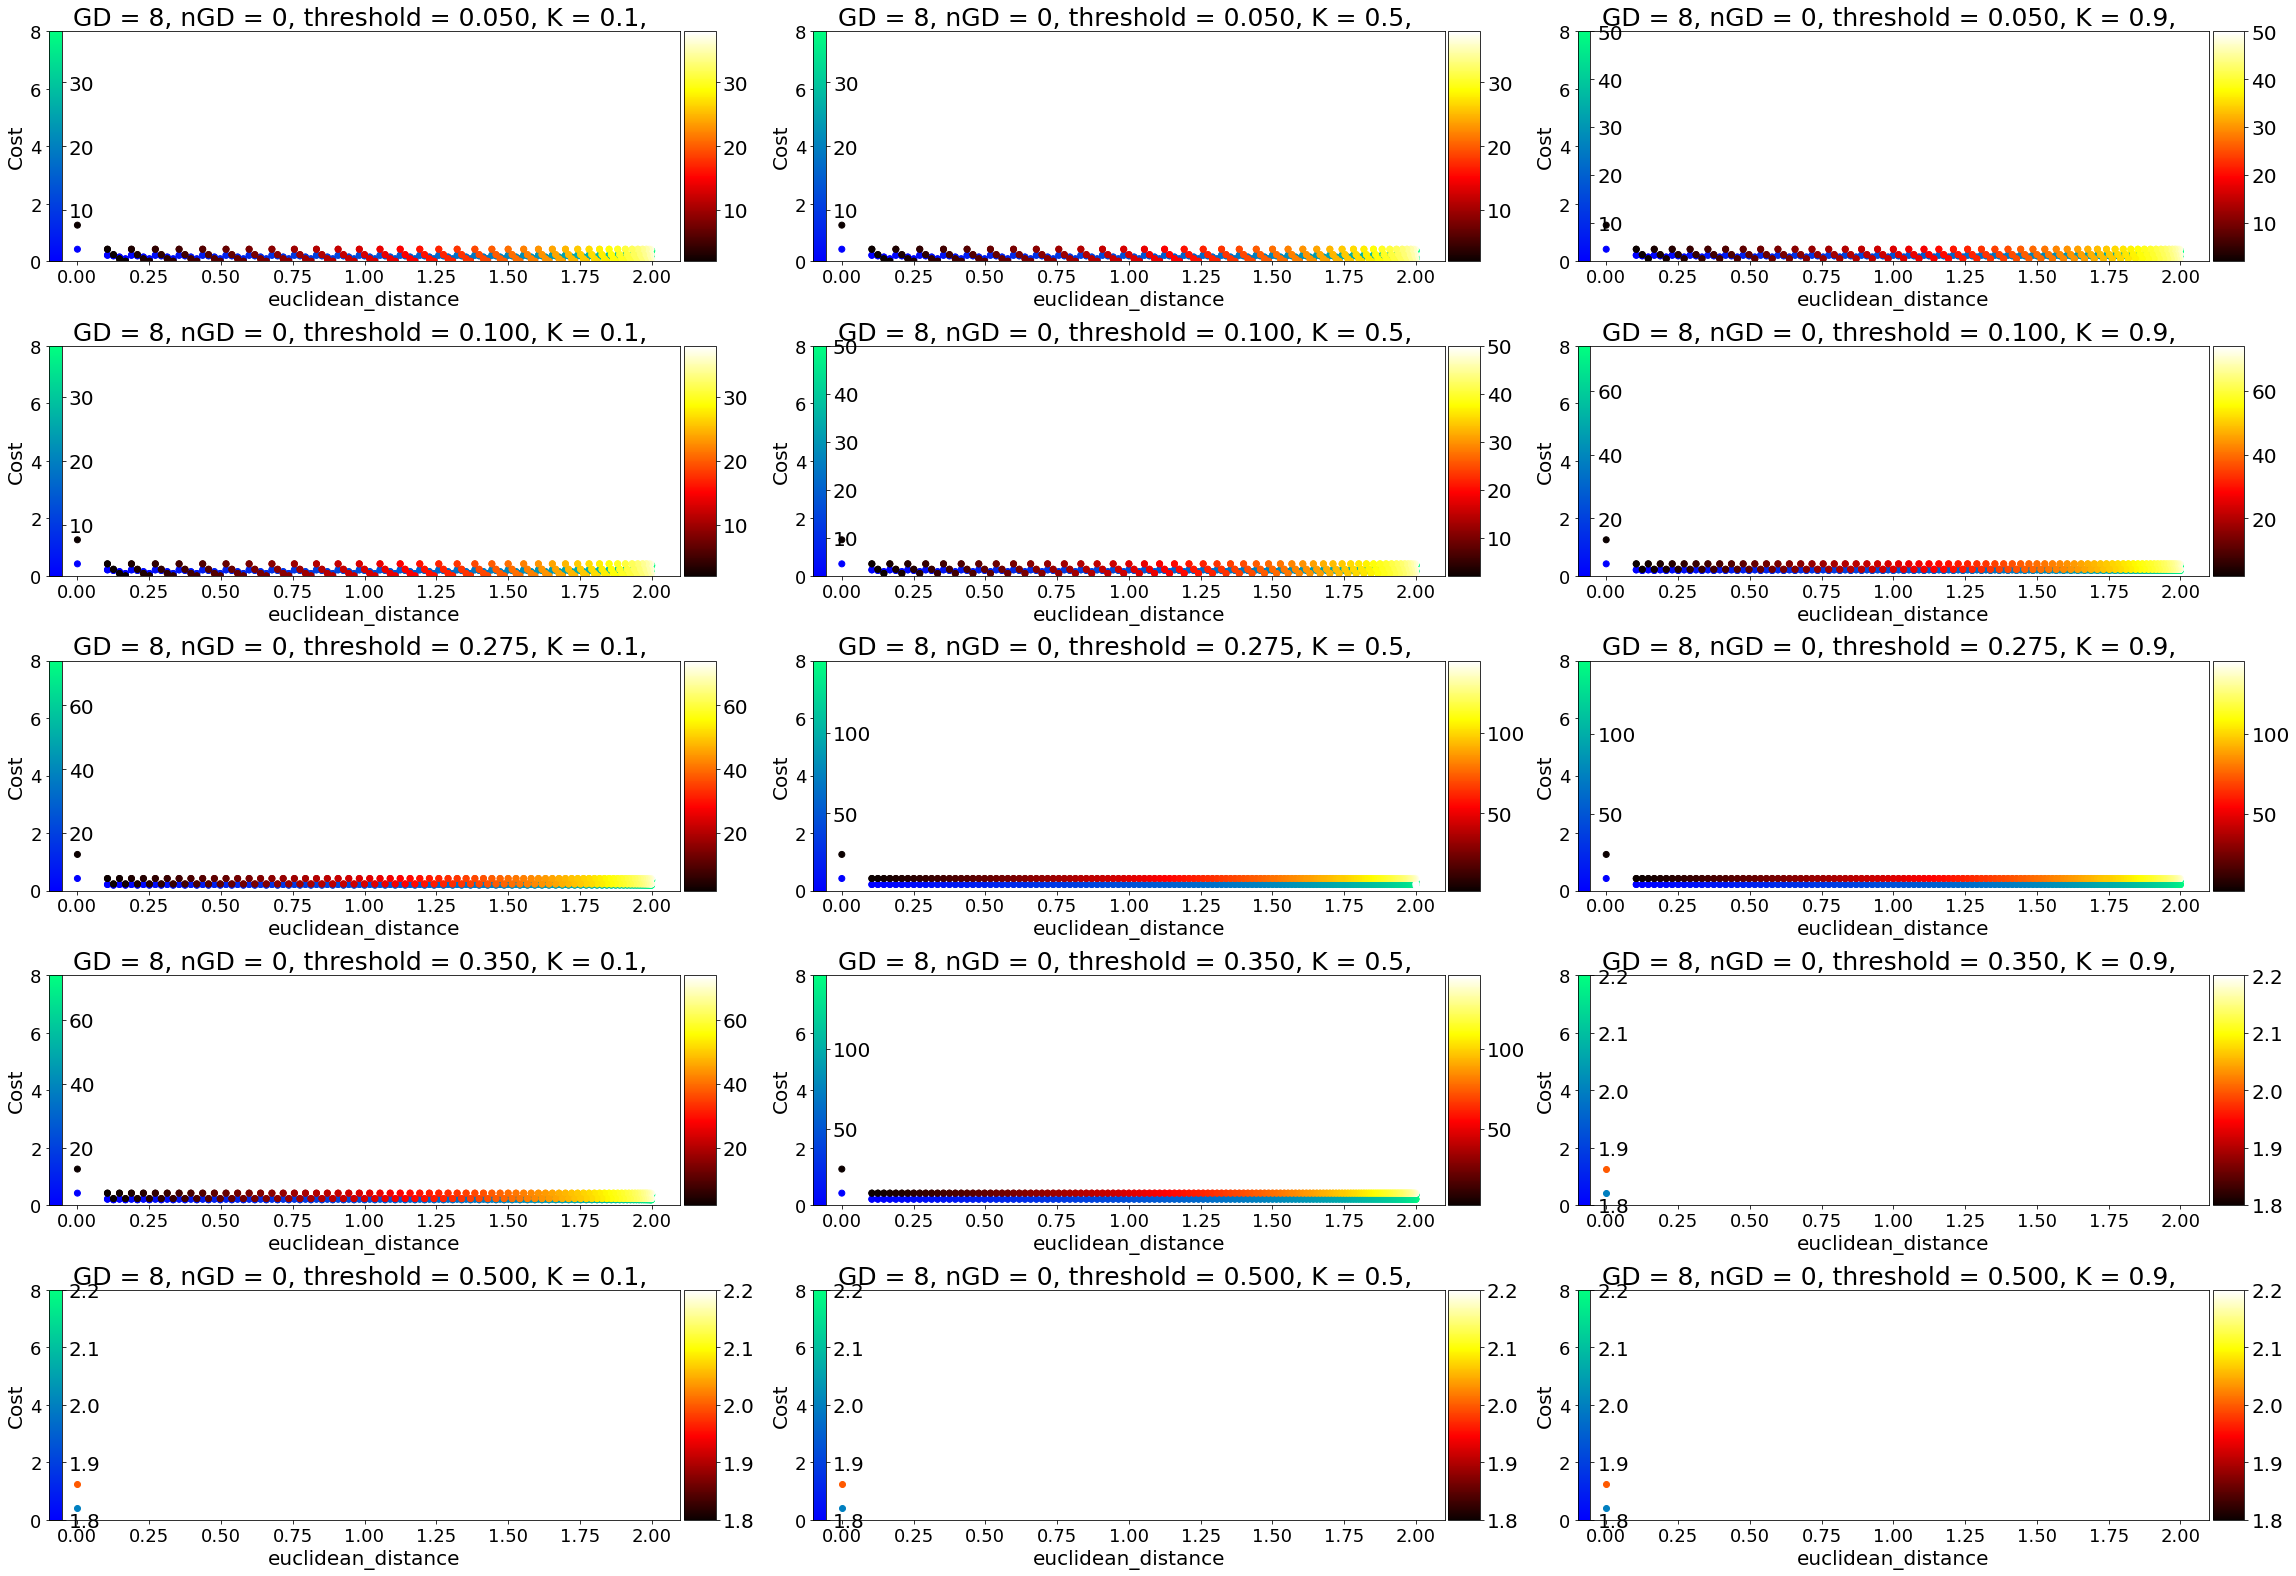

In [51]:
fig,ax = plt.subplots(5,3, figsize = (32,22))
seed = 100
ngd = 0
for i,K in enumerate(Ks):
    for j, threshold in enumerate(thresholds):
        im = ax[j][i].scatter(distance_matrix[seed][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]],
                              active_edge_length['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)], 
                              c = activations['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]], 
                              cmap = 'winter')
        divider = make_axes_locatable(ax[j][i])
        cax0 = divider.append_axes("left", size="5%", pad = 5.5)
        cbar = fig.colorbar(im, cax = cax0)
        cbar.ax.tick_params(labelsize = 20) 
        im = ax[j][i].scatter(distance_matrix[seed][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]],
                              active_triangle_length['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)], 
                              c = activations['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]],
                              cmap = 'hot')
        ax[j][i].set_title('GD = %d, nGD = %d, threshold = %.3f, K = %.1f, '%(GD,ngd,threshold,K), fontsize = 25)
        ax[j][i].set_xlabel('euclidean_distance', fontsize = 20)
        ax[j][i].set_ylabel('Cost', fontsize = 20)
        ax[j][i].tick_params(axis = 'both', which = 'major', labelsize = 18)
        ax[j][i].set_xlim(-0.1,2.1)
        ax[j][i].set_ylim(0,8)
        divider = make_axes_locatable(ax[j][i])
        cax0 = divider.append_axes("right", size="5%", pad = 0.05)
        cbar = fig.colorbar(im, cax = cax0)
        cbar.ax.tick_params(labelsize = 20) 
plt.tight_layout()

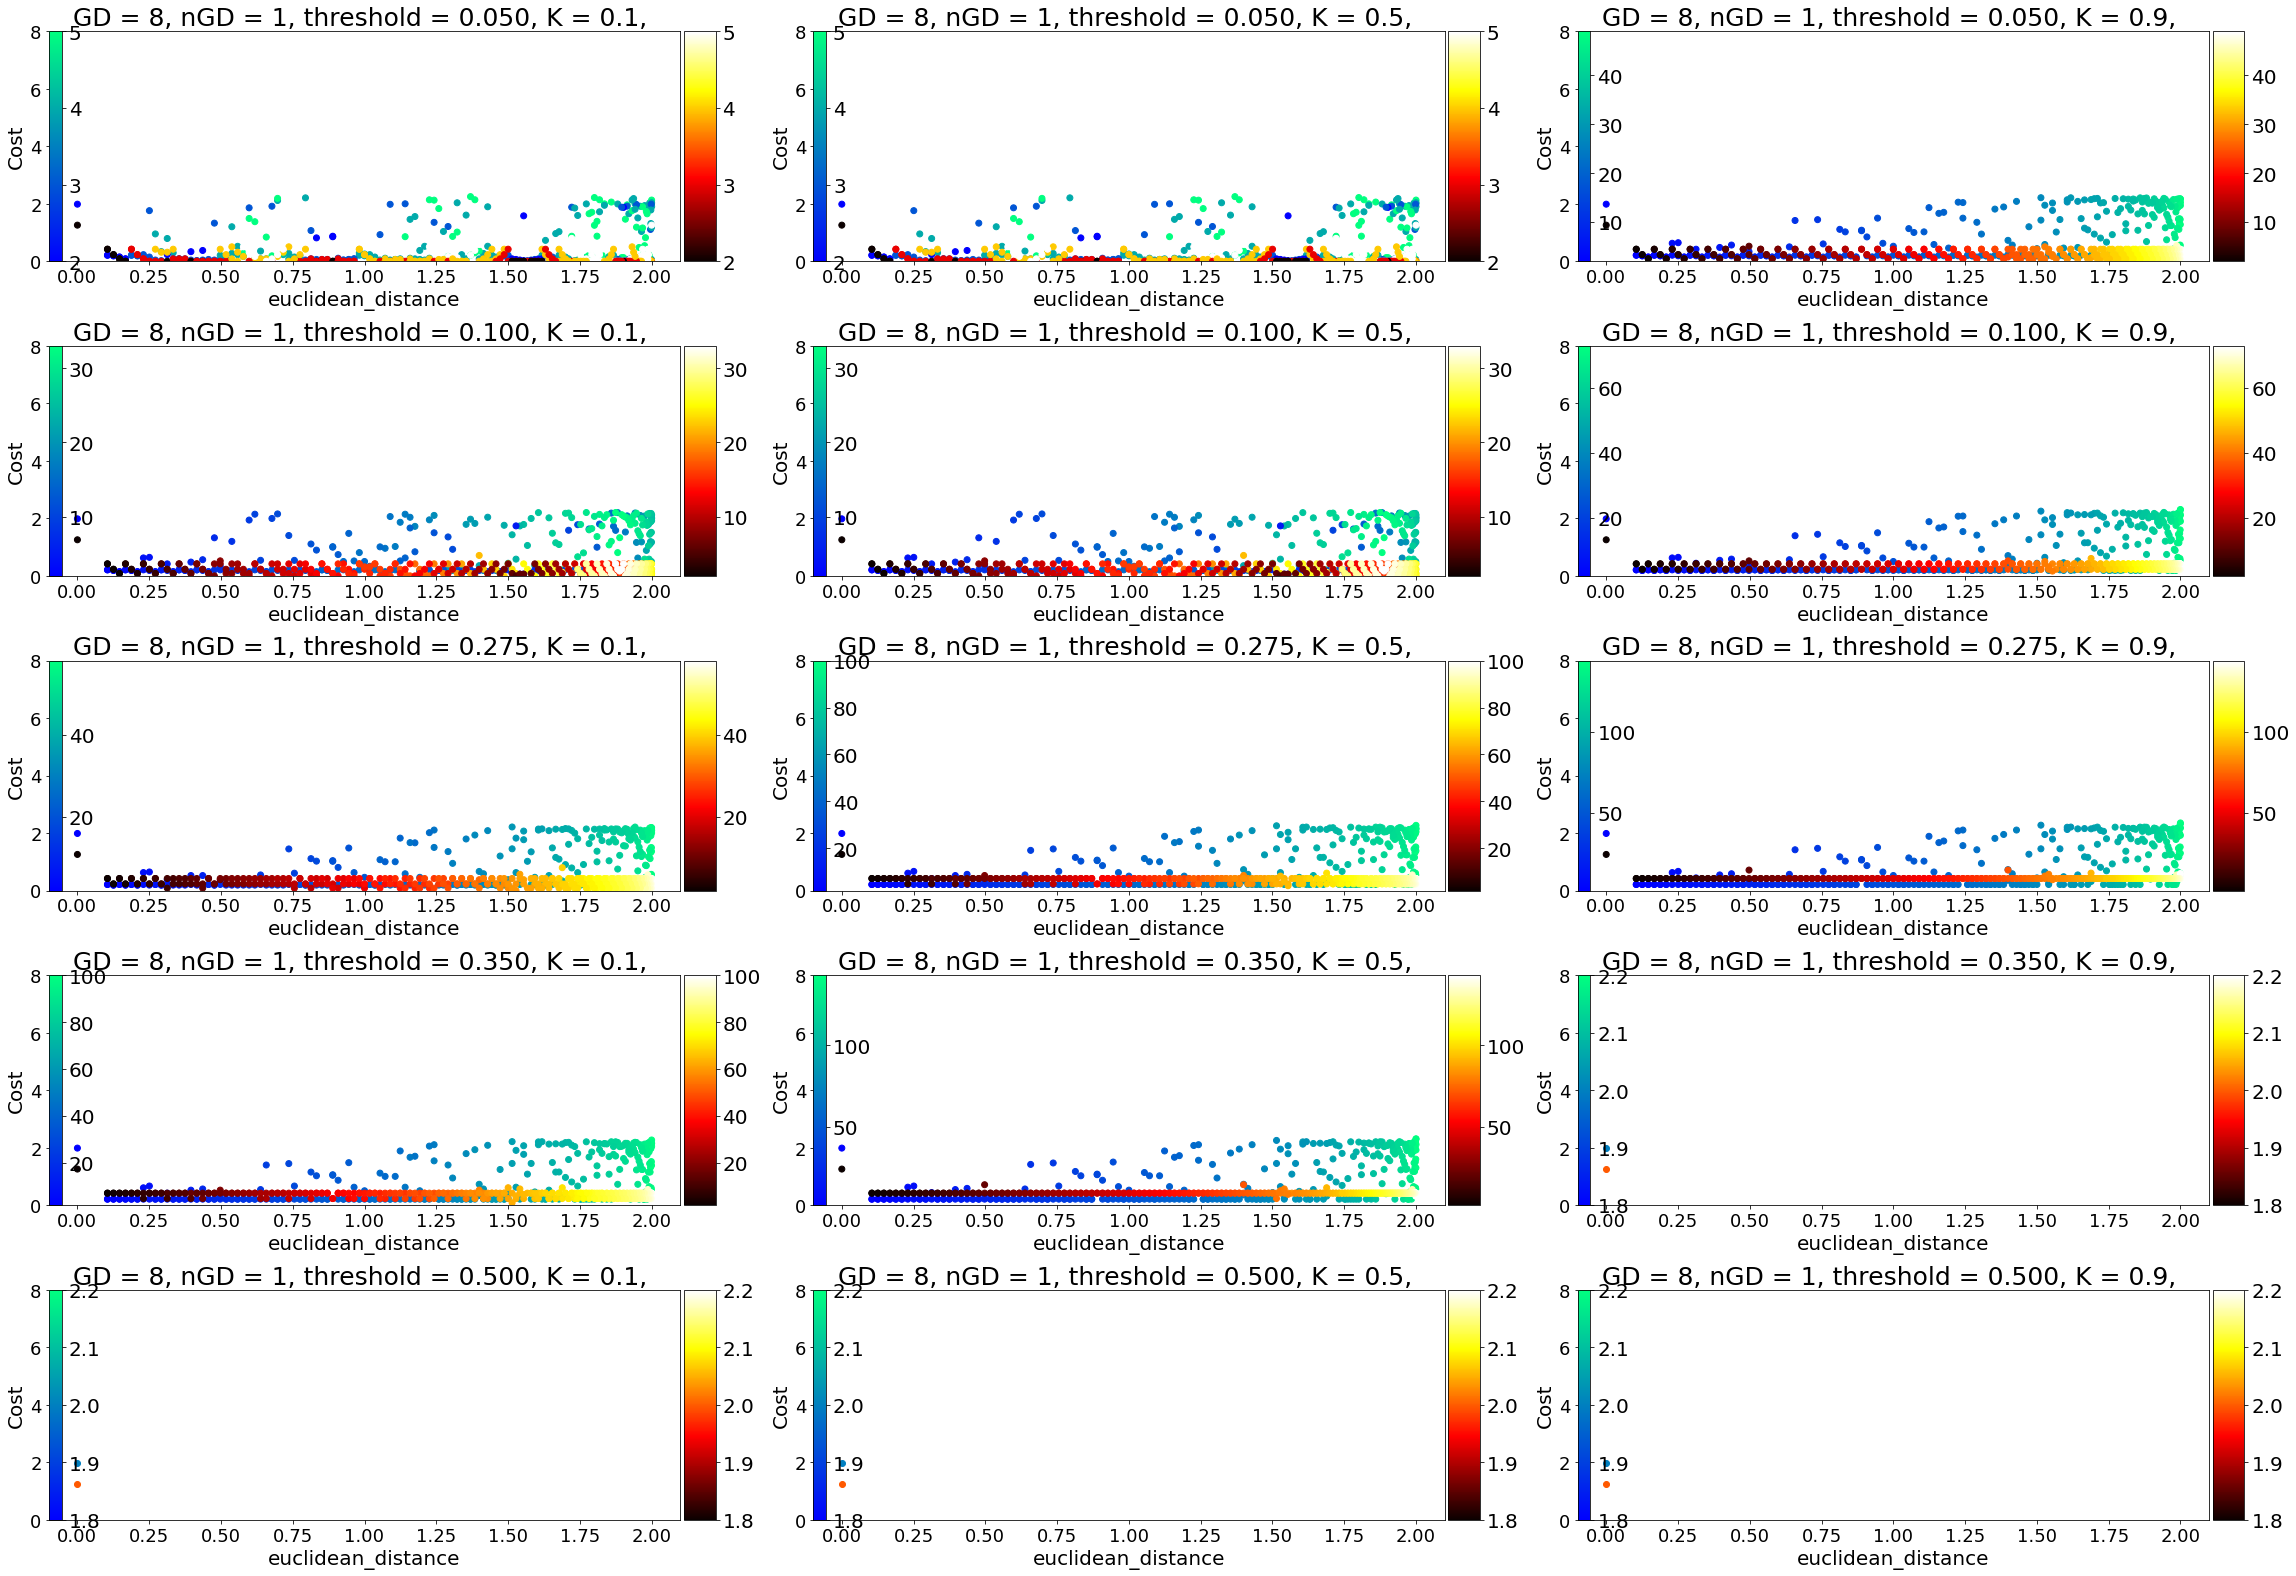

In [52]:
fig,ax = plt.subplots(5,3, figsize = (32,22))
seed = 100
ngd = 1
for i,K in enumerate(Ks):
    for j, threshold in enumerate(thresholds):
        im = ax[j][i].scatter(distance_matrix[seed][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]],
                              active_edge_length['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)], 
                              c = activations['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]], 
                              cmap = 'winter')
        divider = make_axes_locatable(ax[j][i])
        cax0 = divider.append_axes("left", size="5%", pad = 5.5)
        cbar = fig.colorbar(im, cax = cax0)
        cbar.ax.tick_params(labelsize = 20) 
        im = ax[j][i].scatter(distance_matrix[seed][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]],
                              active_triangle_length['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)], 
                              c = activations['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]],
                              cmap = 'hot')
        ax[j][i].set_title('GD = %d, nGD = %d, threshold = %.3f, K = %.1f, '%(GD,ngd,threshold,K), fontsize = 25)
        ax[j][i].set_xlabel('euclidean_distance', fontsize = 20)
        ax[j][i].set_ylabel('Cost', fontsize = 20)
        ax[j][i].tick_params(axis = 'both', which = 'major', labelsize = 18)
        ax[j][i].set_xlim(-0.1,2.1)
        ax[j][i].set_ylim(0,8)
        divider = make_axes_locatable(ax[j][i])
        cax0 = divider.append_axes("right", size="5%", pad = 0.05)
        cbar = fig.colorbar(im, cax = cax0)
        cbar.ax.tick_params(labelsize = 20) 
plt.tight_layout()

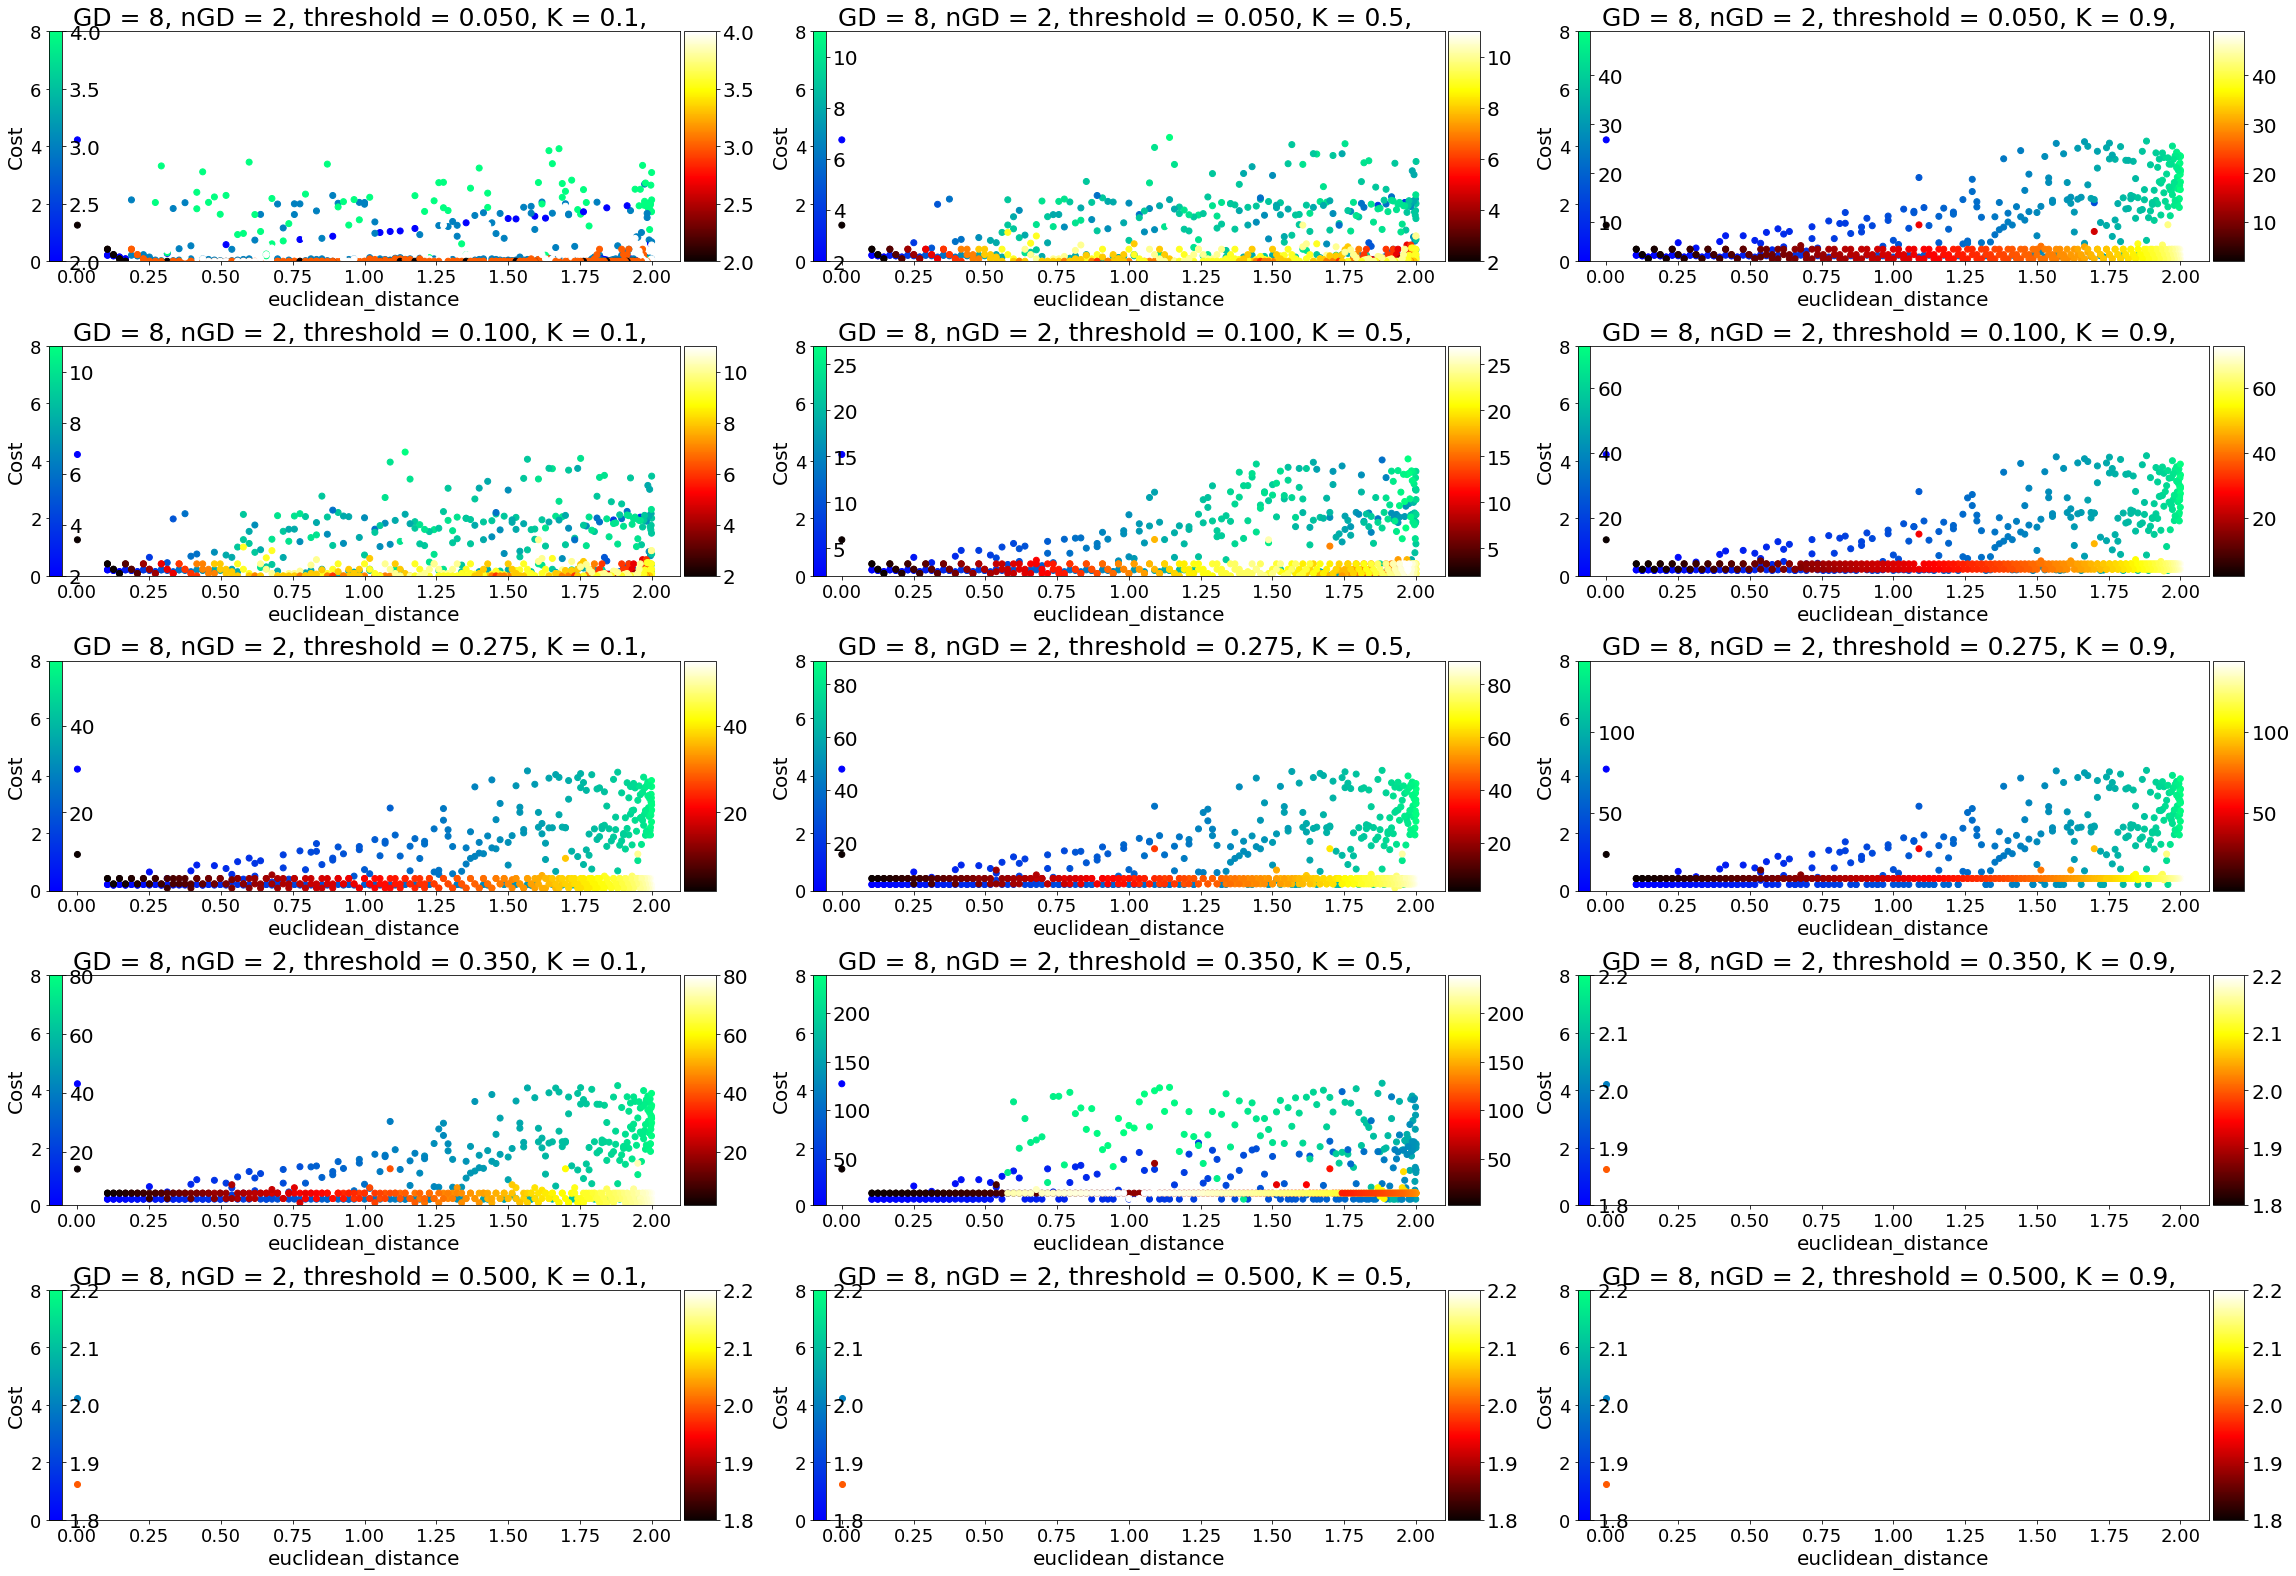

In [53]:
fig,ax = plt.subplots(5,3, figsize = (32,22))
seed = 100
ngd = 2
for i,K in enumerate(Ks):
    for j, threshold in enumerate(thresholds):
        im = ax[j][i].scatter(distance_matrix[seed][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]],
                              active_edge_length['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)], 
                              c = activations['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]], 
                              cmap = 'winter')
        divider = make_axes_locatable(ax[j][i])
        cax0 = divider.append_axes("left", size="5%", pad = 5.5)
        cbar = fig.colorbar(im, cax = cax0)
        cbar.ax.tick_params(labelsize = 20) 
        im = ax[j][i].scatter(distance_matrix[seed][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]],
                              active_triangle_length['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)], 
                              c = activations['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]],
                              cmap = 'hot')
        ax[j][i].set_title('GD = %d, nGD = %d, threshold = %.3f, K = %.1f, '%(GD,ngd,threshold,K), fontsize = 25)
        ax[j][i].set_xlabel('euclidean_distance', fontsize = 20)
        ax[j][i].set_ylabel('Cost', fontsize = 20)
        ax[j][i].tick_params(axis = 'both', which = 'major', labelsize = 18)
        ax[j][i].set_xlim(-0.1,2.1)
        ax[j][i].set_ylim(0,8)
        divider = make_axes_locatable(ax[j][i])
        cax0 = divider.append_axes("right", size="5%", pad = 0.05)
        cbar = fig.colorbar(im, cax = cax0)
        cbar.ax.tick_params(labelsize = 20) 
plt.tight_layout()

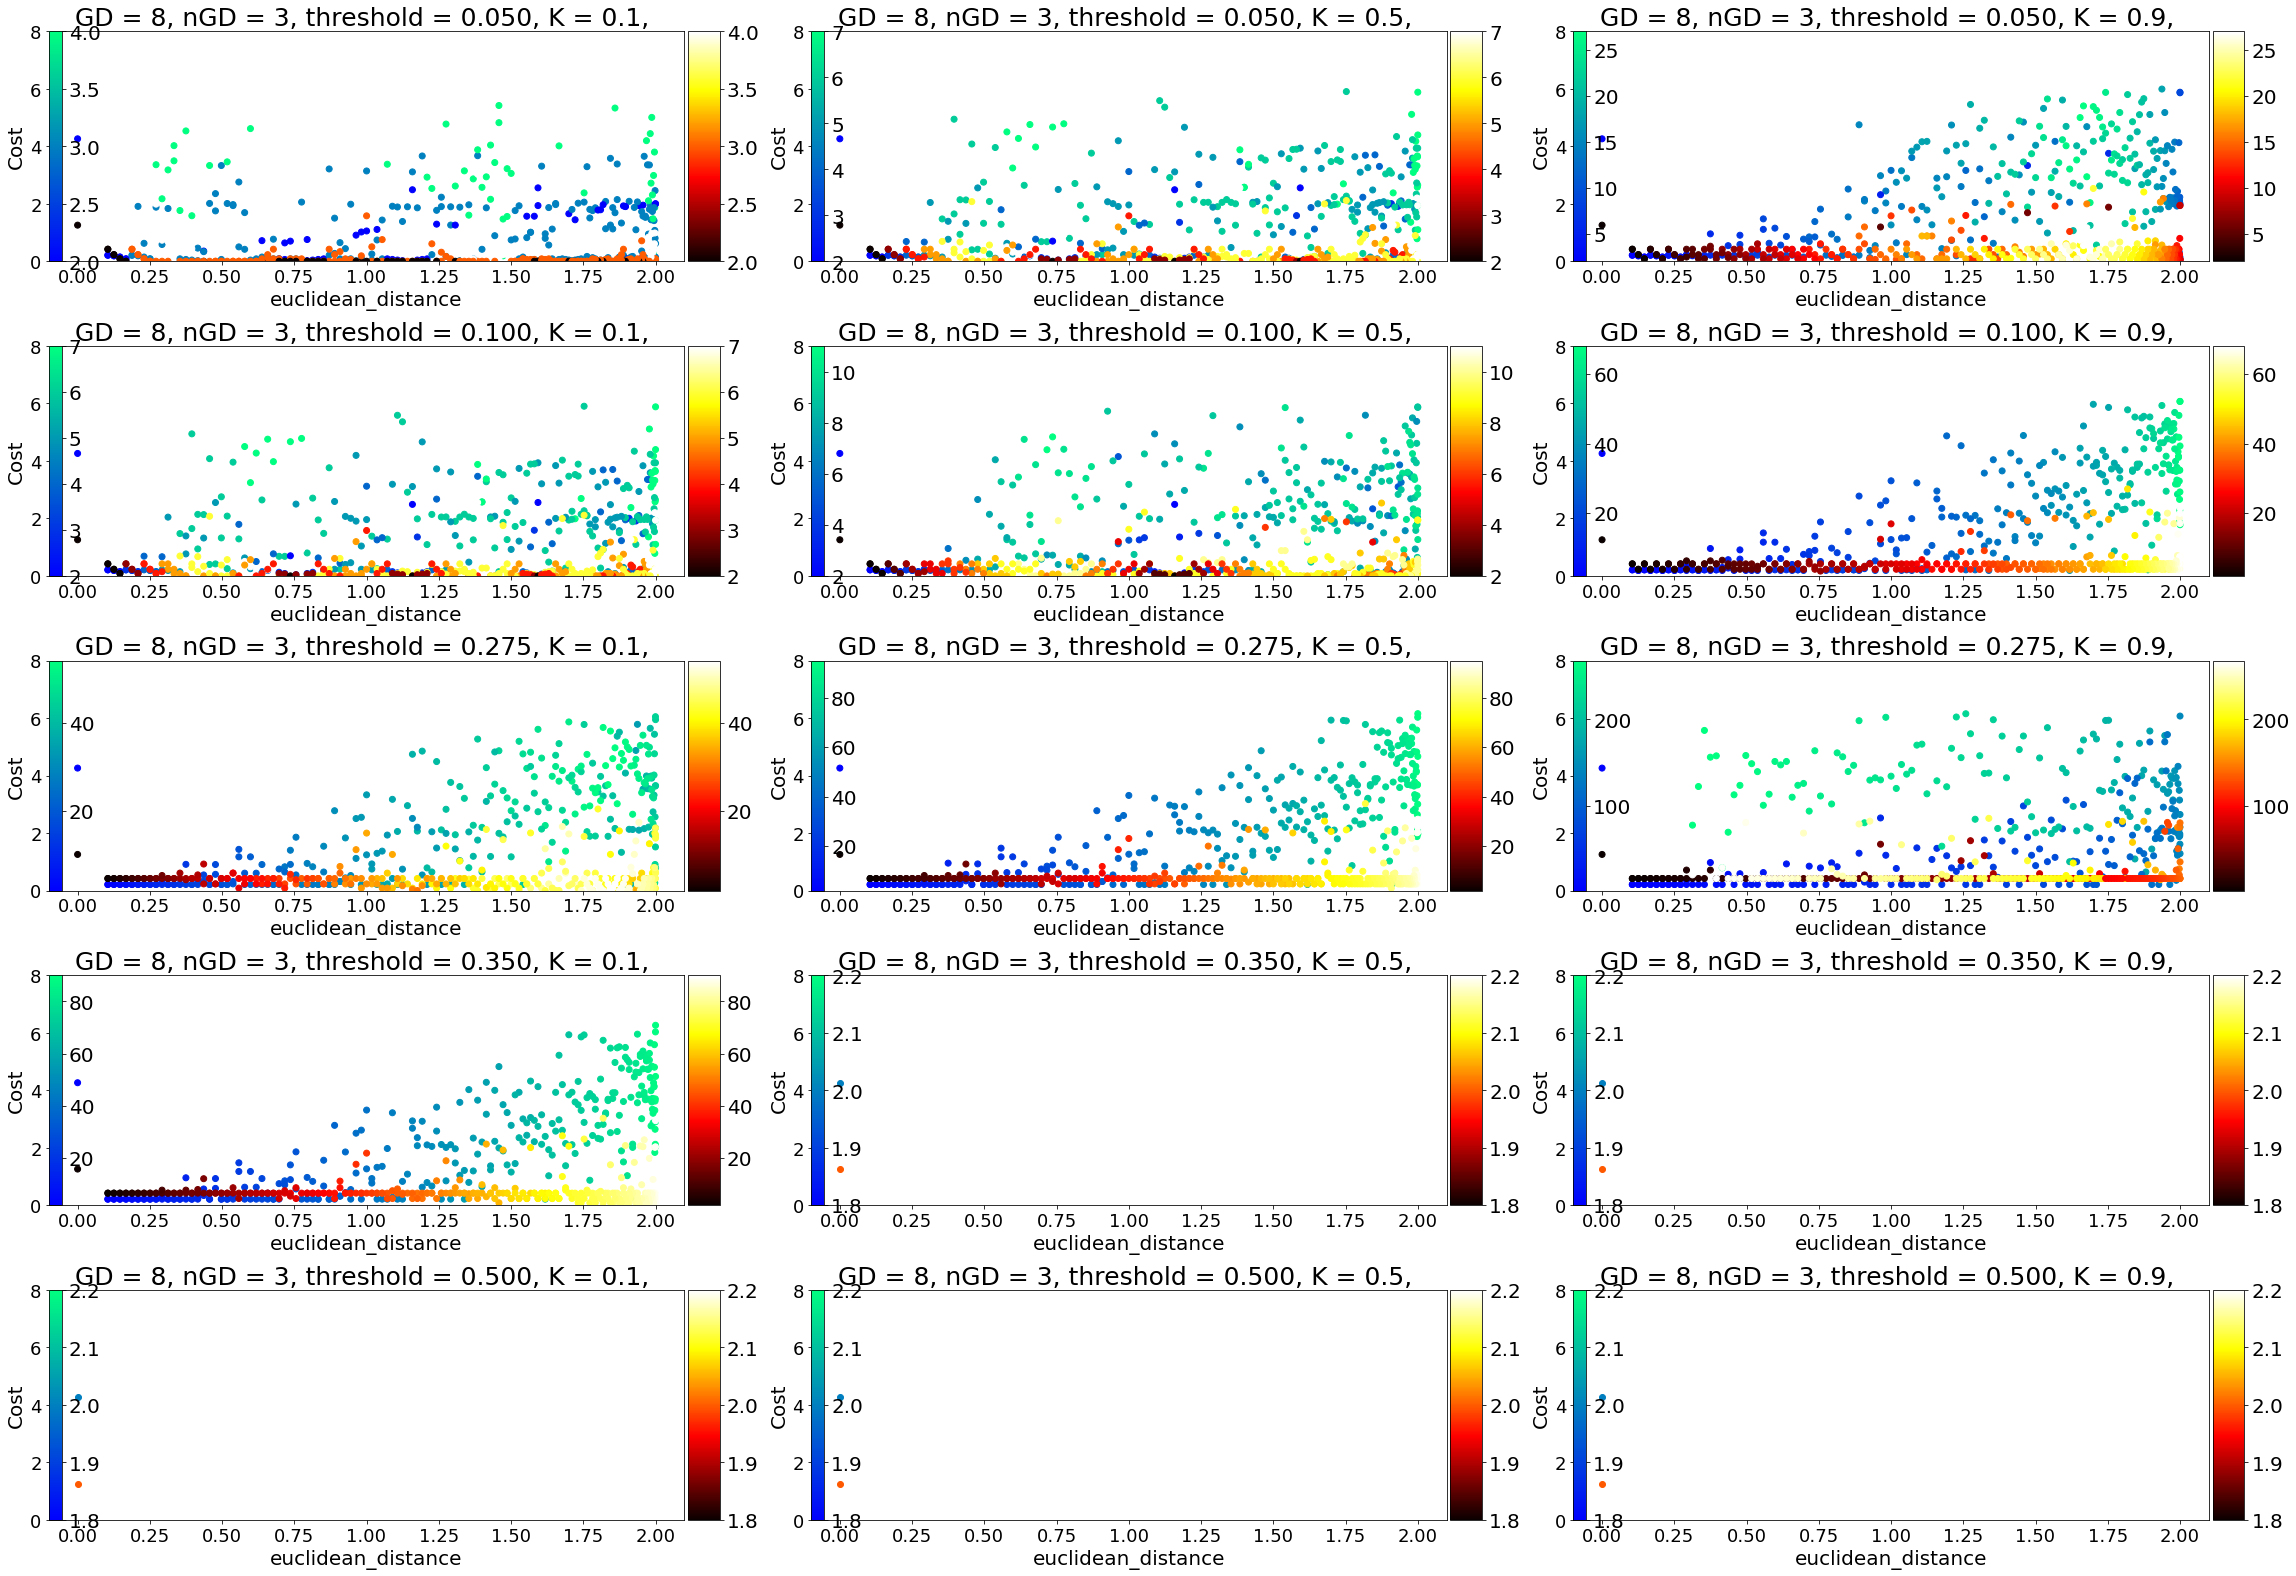

In [54]:
fig,ax = plt.subplots(5,3, figsize = (32,22))
seed = 100
ngd = 3
for i,K in enumerate(Ks):
    for j, threshold in enumerate(thresholds):
        im = ax[j][i].scatter(distance_matrix[seed][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]],
                              active_edge_length['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)], 
                              c = activations['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]], 
                              cmap = 'winter')
        divider = make_axes_locatable(ax[j][i])
        cax0 = divider.append_axes("left", size="5%", pad = 5.5)
        cbar = fig.colorbar(im, cax = cax0)
        cbar.ax.tick_params(labelsize = 20) 
        im = ax[j][i].scatter(distance_matrix[seed][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]],
                              active_triangle_length['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)], 
                              c = activations['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]],
                              cmap = 'hot')
        ax[j][i].set_title('GD = %d, nGD = %d, threshold = %.3f, K = %.1f, '%(GD,ngd,threshold,K), fontsize = 25)
        ax[j][i].set_xlabel('euclidean_distance', fontsize = 20)
        ax[j][i].set_ylabel('Cost', fontsize = 20)
        ax[j][i].tick_params(axis = 'both', which = 'major', labelsize = 18)
        ax[j][i].set_xlim(-0.1,2.1)
        ax[j][i].set_ylim(0,8)
        divider = make_axes_locatable(ax[j][i])
        cax0 = divider.append_axes("right", size="5%", pad = 0.05)
        cbar = fig.colorbar(im, cax = cax0)
        cbar.ax.tick_params(labelsize = 20) 
plt.tight_layout()

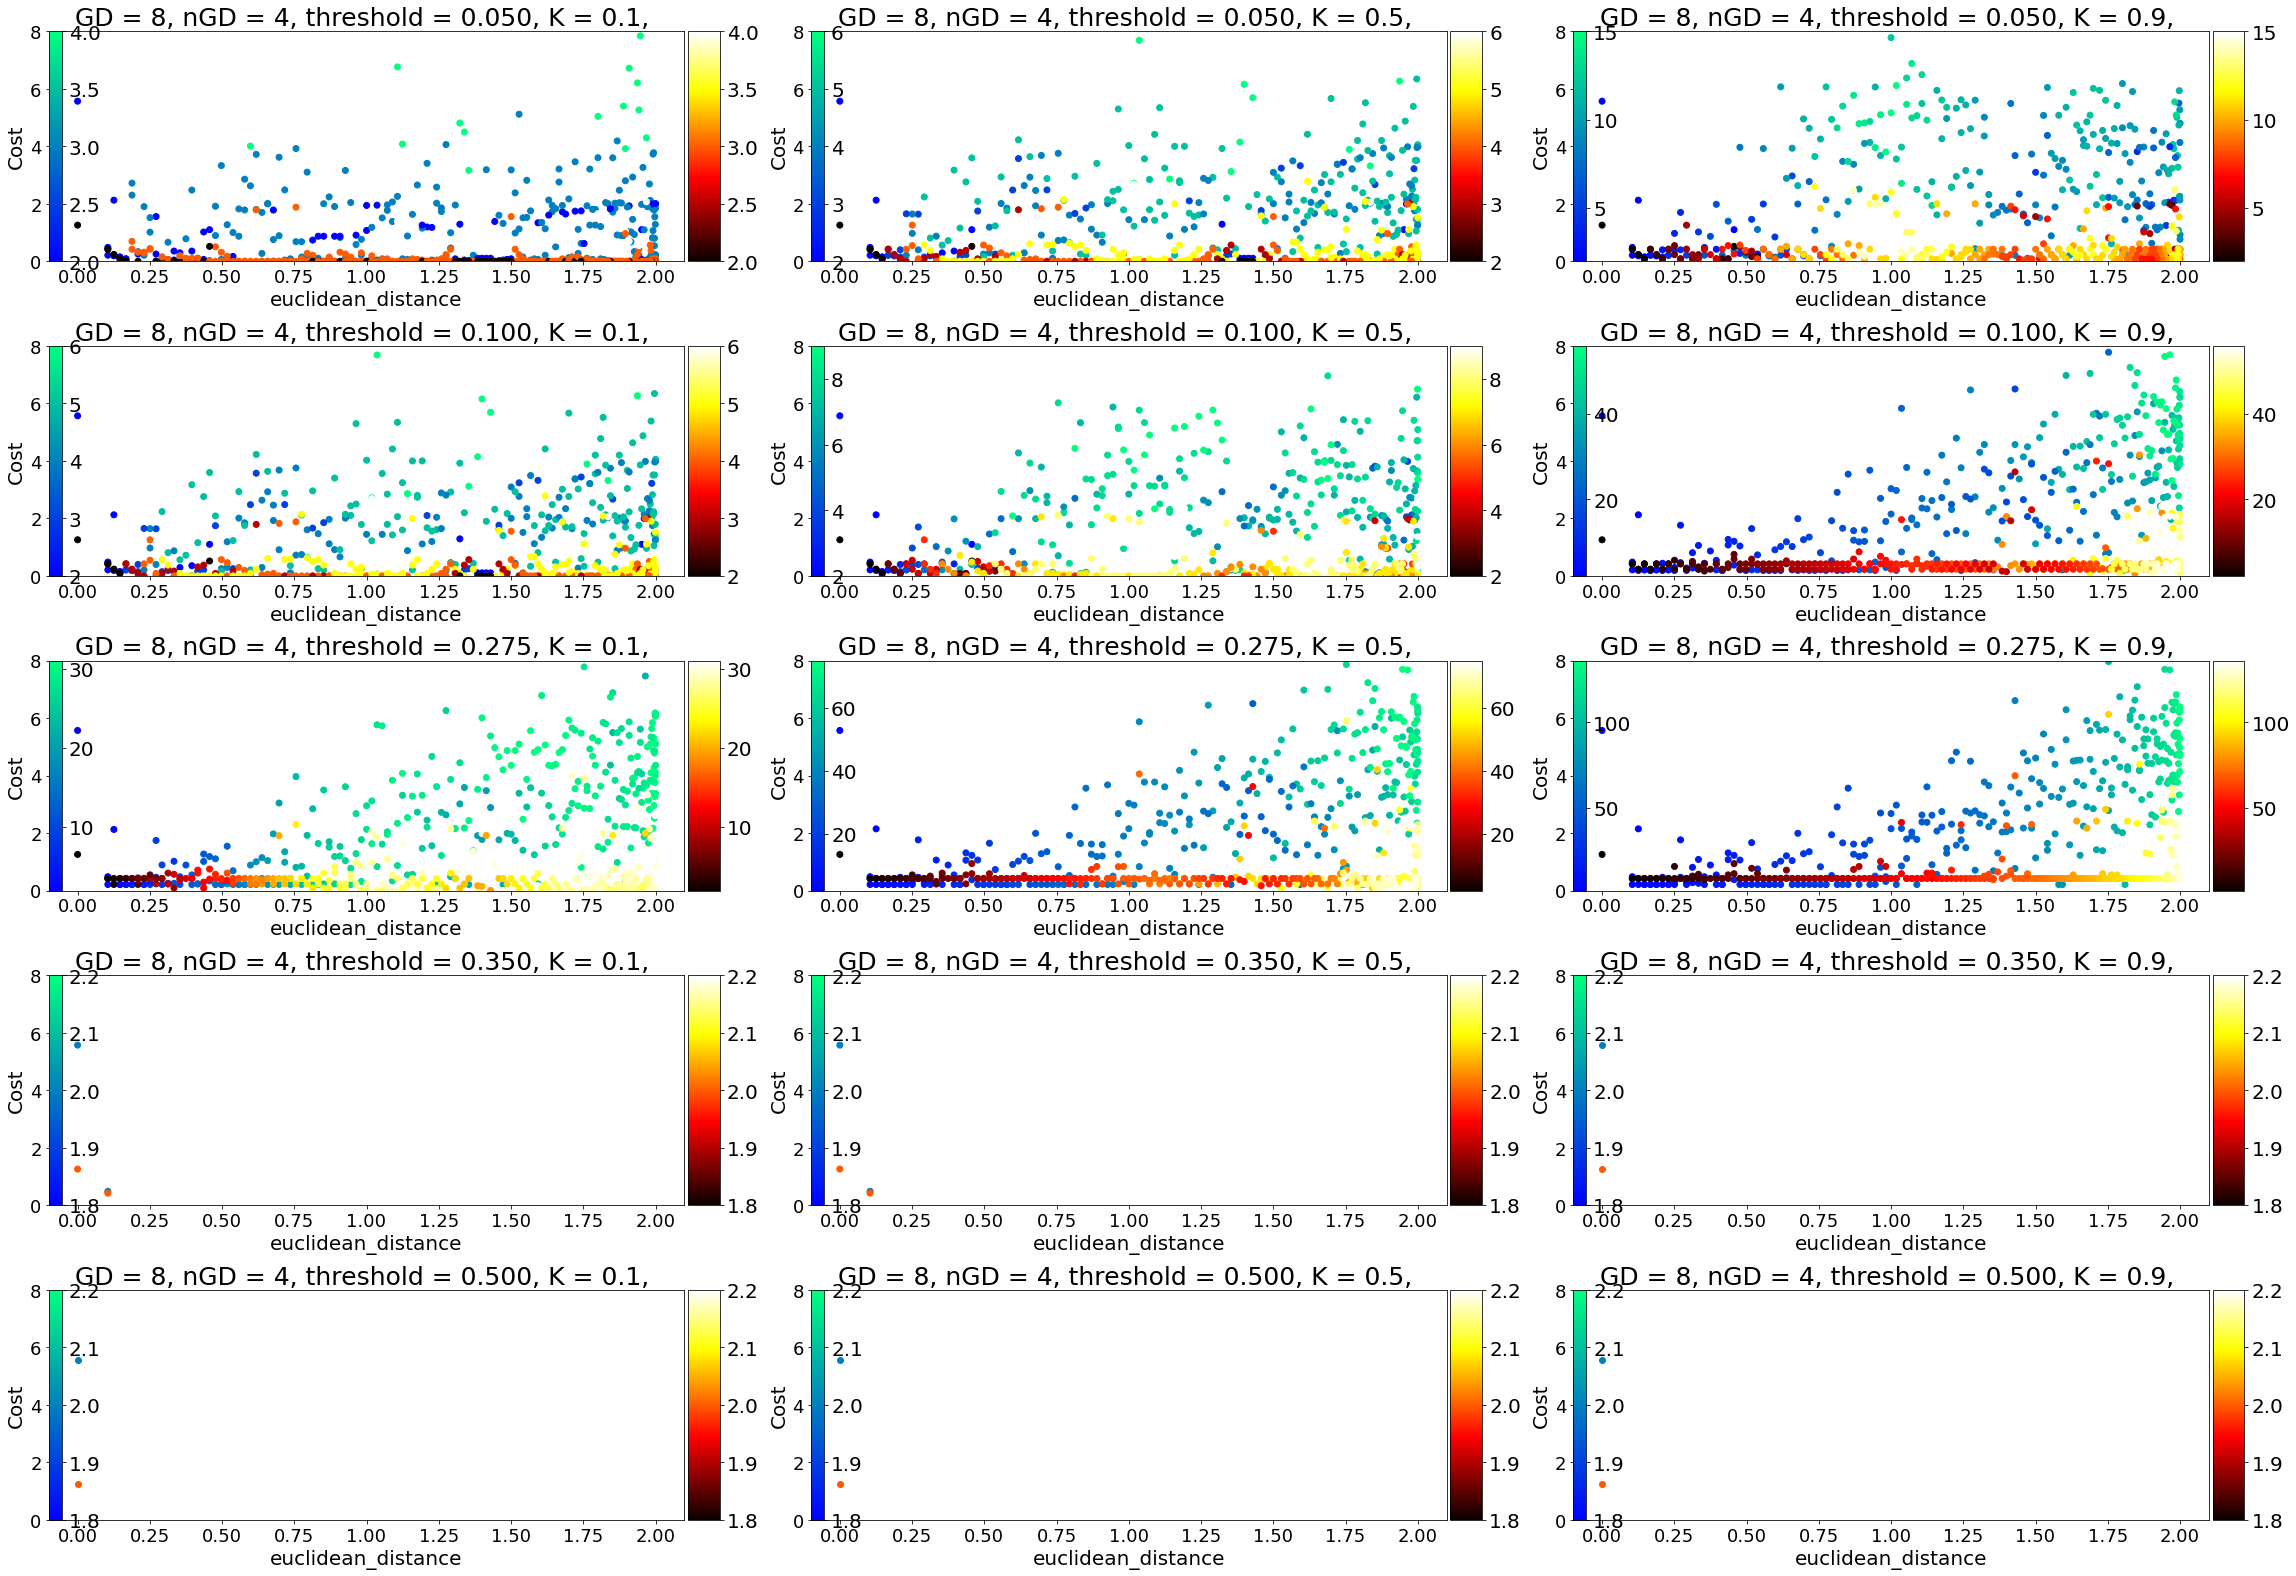

In [55]:
fig,ax = plt.subplots(5,3, figsize = (32,22))
seed = 100
ngd = 4
for i,K in enumerate(Ks):
    for j, threshold in enumerate(thresholds):
        im = ax[j][i].scatter(distance_matrix[seed][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]],
                              active_edge_length['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)], 
                              c = activations['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]], 
                              cmap = 'winter')
        divider = make_axes_locatable(ax[j][i])
        cax0 = divider.append_axes("left", size="5%", pad = 5.5)
        cbar = fig.colorbar(im, cax = cax0)
        cbar.ax.tick_params(labelsize = 20) 
        im = ax[j][i].scatter(distance_matrix[seed][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]],
                              active_triangle_length['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)], 
                              c = activations['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)][masks['%d,%.3f,%.1f,%d'%(ngd,threshold,K,seed)]],
                              cmap = 'hot')
        ax[j][i].set_title('GD = %d, nGD = %d, threshold = %.3f, K = %.1f, '%(GD,ngd,threshold,K), fontsize = 25)
        ax[j][i].set_xlabel('euclidean_distance', fontsize = 20)
        ax[j][i].set_ylabel('Cost', fontsize = 20)
        ax[j][i].tick_params(axis = 'both', which = 'major', labelsize = 18)
        ax[j][i].set_xlim(-0.1,2.1)
        ax[j][i].set_ylim(0,8)
        divider = make_axes_locatable(ax[j][i])
        cax0 = divider.append_axes("right", size="5%", pad = 0.05)
        cbar = fig.colorbar(im, cax = cax0)
        cbar.ax.tick_params(labelsize = 20) 
plt.tight_layout()